In [1]:
%matplotlib inline

import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import biosppy.signals.tools
import scipy.signal as sig

In [2]:
def sanitize(x):
    s = pd.Series(x)
    s.fillna(s.median(), inplace=True)
    return s.values

def normalize(x):
    return (x - x.min()) / ( x.max() - x.min())

def preprocess(x, max_len=24):
    return normalize(sanitize(x))[:max_len]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a541dd810>,
      dtype=object)

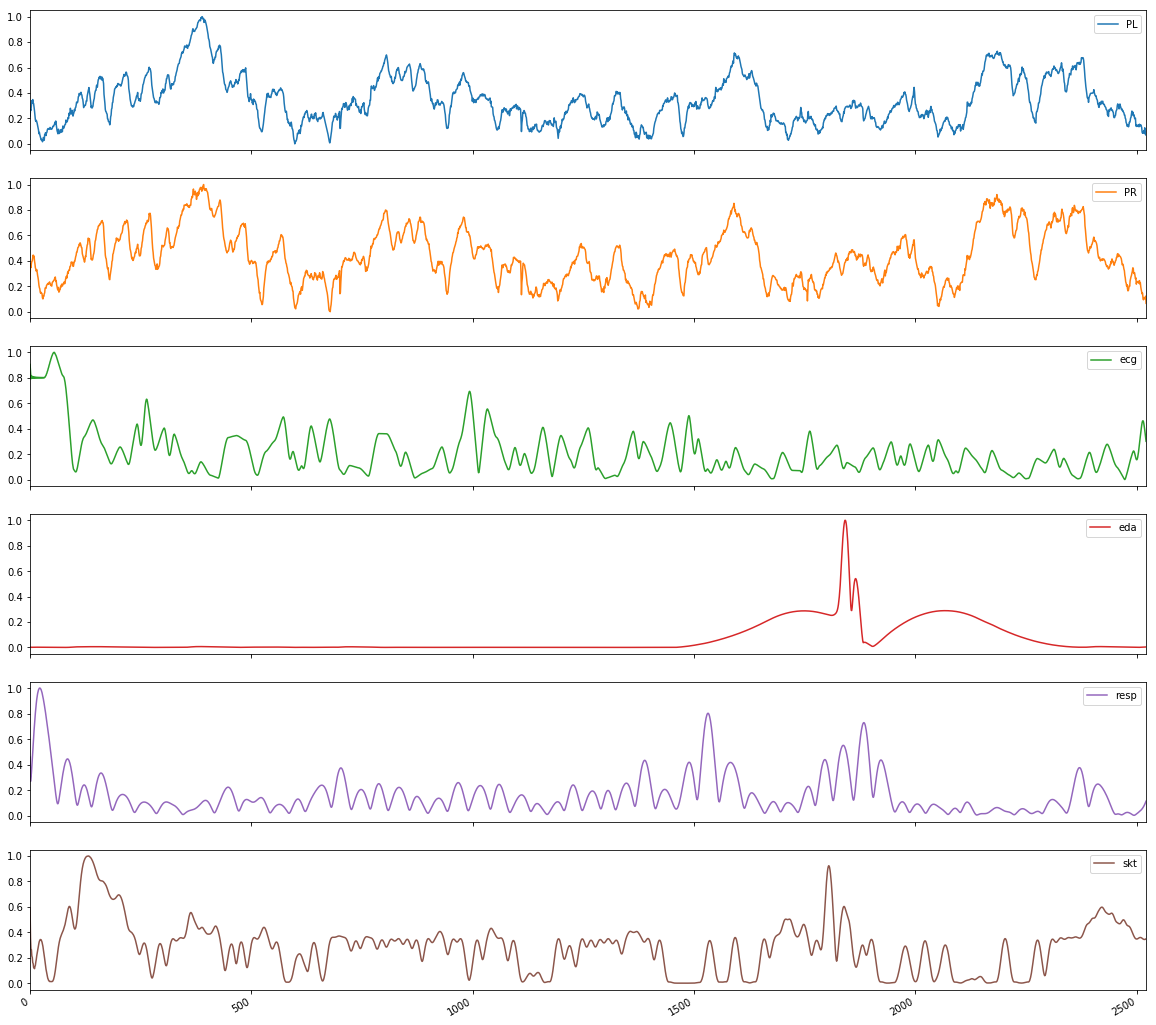

In [3]:
sid = 10
f = map(np.load, glob.glob("../export/data/feature_data_10_*_with_pupil.npz".format(sid)))[0]

sinfo = f["session_info"]
ecg = f['valence'].tolist()["ECG_std"]
eda = f['valence'].tolist()["EDA_std"]
skt = f['valence'].tolist()["SKT_std"]
resp = f['valence'].tolist()["Resp_std"]
pupil = f['pupil'].tolist()

max_len = min([len(s) for s in [ecg, eda, skt, resp, pupil[0]]])

data = { name: preprocess(signal, max_len) for name, signal in zip(['ecg', 'eda', 'skt', 'resp'], [ecg, eda, skt, resp]) }
data["PL"] = preprocess(pupil[0], max_len)
data["PR"] = preprocess(pupil[1], max_len)

data = pd.DataFrame(data)
data.plot(figsize=(20,20), subplots=(2,3))